In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('data/credit-a.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [3]:
data.iloc[:,-1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [4]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)  # 将-1替换成0

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x, y, epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 1s 1ms/sample - loss: 4.3926 - acc: 0.5130
Epoch 2/100
653/653 [==============================] - 0s 58us/sample - loss: 2.9399 - acc: 0.6248
Epoch 3/100
653/653 [==============================] - 0s 57us/sample - loss: 2.3662 - acc: 0.5896
Epoch 4/100
653/653 [==============================] - 0s 61us/sample - loss: 2.1470 - acc: 0.5881
Epoch 5/100
653/653 [==============================] - 0s 60us/sample - loss: 1.9813 - acc: 0.6034
Epoch 6/100
653/653 [==============================] - 0s 57us/sample - loss: 1.7196 - acc: 0.5926
Epoch 7/100
653/653 [==============================] - 0s 60us/sample - loss: 1.4333 - acc: 0.6049
Epoch 8/100
653/653 [==============================] - 0s 61us/sample - loss: 1.4396 - acc: 0.6279
Epoch 9/100
653/653 [==============================] - 0s 58us/sample - loss: 1.1866 - acc: 0.6248
Epoch 10/100
653/653 [==============================] - 0s 60us/sample - loss: 0.9983 - a

Epoch 80/100
653/653 [==============================] - 0s 60us/sample - loss: 0.5535 - acc: 0.7963
Epoch 81/100
653/653 [==============================] - 0s 61us/sample - loss: 0.5042 - acc: 0.8208
Epoch 82/100
653/653 [==============================] - 0s 58us/sample - loss: 0.4617 - acc: 0.8361
Epoch 83/100
653/653 [==============================] - 0s 60us/sample - loss: 0.4288 - acc: 0.8377
Epoch 84/100
653/653 [==============================] - 0s 60us/sample - loss: 0.5300 - acc: 0.8009
Epoch 85/100
653/653 [==============================] - 0s 58us/sample - loss: 0.4682 - acc: 0.8178
Epoch 86/100
653/653 [==============================] - 0s 57us/sample - loss: 0.6624 - acc: 0.7917
Epoch 87/100
653/653 [==============================] - 0s 60us/sample - loss: 0.5536 - acc: 0.8132
Epoch 88/100
653/653 [==============================] - 0s 58us/sample - loss: 0.4414 - acc: 0.8346
Epoch 89/100
653/653 [==============================] - 0s 61us/sample - loss: 0.5402 - acc: 0.8147


In [8]:
history.history.keys()

dict_keys(['loss', 'acc'])

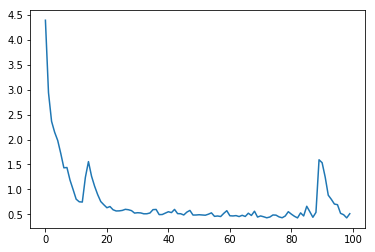

In [9]:
plt.plot(history.epoch, history.history.get('loss'))

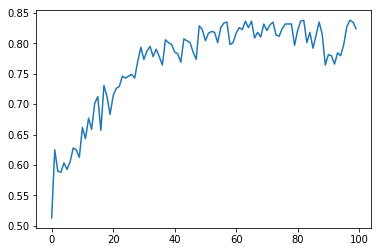

In [10]:
plt.plot(history.epoch, history.history.get('acc'))